In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import nltk
from nltk.corpus import stopwords
from collections import Counter

# Libraries for visualisation

import matplotlib.pyplot as plt
import seaborn as sns

nltk: This imports the Natural Language Toolkit (NLTK) library. NLTK is a powerful suite of libraries for working with human language data.

from nltk.corpus import stopwords: This line imports the stopwords function from the NLTK corpus collection. Stopwords are common words in a language (like "the", "a", "an", "in") that might not be very meaningful for analysis. This function allows you to access a list of stopwords for a specific language (usually English by default).

from collections import Counter: This imports the Counter class from the collections library. A Counter is a container that keeps track of how many times each element appears in an iterable (like a list or string). This is useful for tasks like counting word frequencies in text analysis.

feature_extraction.text: This submodule within scikit-learn focuses on feature extraction from text data. It provides tools to convert textual data into numerical features that can be used in machine learning algorithms.

TfidfVectorizer:
By using TfidfVectorizer, you can transform your text data into a format suitable for various NLP tasks, such as document classification, information retrieval, topic modeling, and more. It helps machines understand the meaning and importance of words within a document based on their frequency and relevance.




In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from google.colab import files
import io
uploaded = files.upload()

Saving spam.csv to spam.csv


In [51]:
df = pd.read_csv(io.BytesIO(uploaded['spam.csv']), encoding='latin-1')

In [52]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [53]:
#drop unnecessary columns

df.drop(columns =['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)


In [54]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
#all values are non null
df.shape

(5572, 2)

In [ ]:
df.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [55]:
#rename the columns to more understandable names

df.rename(columns={'v1':'Category', 'v2':'Message'}, inplace=True)

In [56]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [41]:
import plotly.express as px

fig = px.pie(df, names='Category', color_discrete_sequence=px.colors.sequential.Emrld_r)
fig.update_layout(title='Distribution of Spam and Ham')
fig.update_layout(width=600, height=400)
fig.show()

In [42]:
counts = df['Category'].value_counts()
fig = px.bar(counts, x=counts.index, y=counts.values, labels={'x': 'Category', 'y': 'Count'}, title='Counts of Spam and Ham')
fig.update_layout(width=800, height=600)
# Show the plot
fig.show()


In [57]:
# #label encoding

# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# df['encoded_category'] = le.fit_transform(df['Category'])

df.loc[df["Category"] == "spam", "Category"] = 0
df.loc[df["Category"] == "ham", "Category"] = 1

In [58]:
df.head()

,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


In [59]:
#split to variable and targets

X = df['Message']
y = df['Category']

In [60]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
x_train.head()

1978    No I'm in the same boat. Still here at my moms...
3989    (Bank of Granite issues Strong-Buy) EXPLOSIVE ...
3935       They r giving a second chance to rahul dengra.
4078       O i played smash bros  &lt;#&gt;  religiously.
4086    PRIVATE! Your 2003 Account Statement for 07973...
Name: Message, dtype: object

In [62]:
y_train.head()

1978    1
3989    0
3935    1
4078    1
4086    0
Name: Category, dtype: object

In [65]:
print(x_test.shape, y_test.shape, x_train.shape, y_train.shape)

(1115,) (1115,) (4457,) (4457,)


#Feature Extraction

In [103]:
feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english', lowercase=True, preprocessor=None)
#min_df ==> min frequency for a word to be added in the vocabulary
# The stop_words argument allows you to specify a list of stopwords to be excluded from the features created by the vectorizer.here it exclude english stopwords
#lowercase true converts all characters to lowercase before tokenising

In [117]:
x_train_features = feature_extraction.fit_transform(x_train)
# x_test_features = feature_extraction.fit_transform(x_test)
#fit means trainign the vectorizer with the first fit_transform. when we call fittransform again,
#the vectorizer will be trained again with another vector dimension
#Don't create new vectorizer and transform your input_data with already created one. so dont_call fit_transorm twice, or it will cause error in this case.

x_test_features = feature_extraction.transform(x_test)

x_test_features

<1115x7472 sparse matrix of type '<class 'numpy.float64'>'
	with 7693 stored elements in Compressed Sparse Row format>

In [111]:
# Convert Y_train and Y_test to integer type
y_train = y_train.astype("int")
y_test = y_test.astype("int")

#Model selection and training

In [112]:
model = LogisticRegression()

In [118]:
model.fit(x_train_features,y_train)

LogisticRegression()

In [114]:
#Evaluating trained model

y_pred_train = model.predict(x_train_features)

In [132]:
#Accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Accuracy on training data:", accuracy_train)

Accuracy on training data: 0.9694862014808167


model is accurate on training data

In [119]:
y_pred_test = model.predict(x_test_features)
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Accuracy on test data:", accuracy_test)

Accuracy on test data: 0.9524663677130045


Text(0.5, 1.0, 'Confusion Matrix')

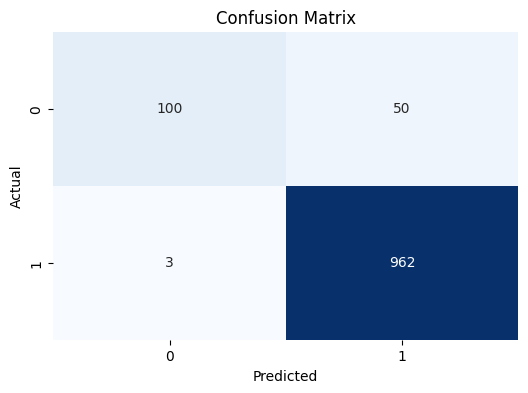

In [133]:

confusion_matrix = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

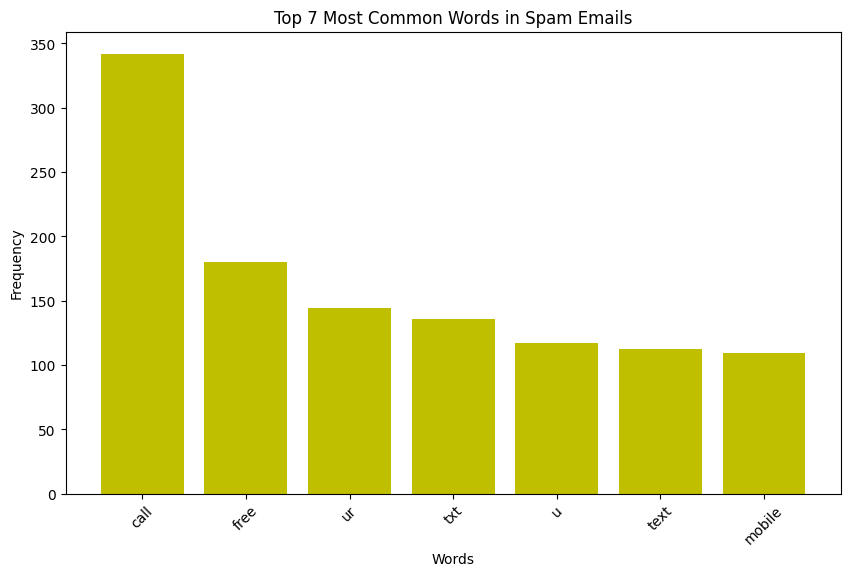

In [136]:
#  Data visualization - Top 7 Most Common Words in Spam Emails

stop_words = set(stopwords.words('english'))
spam_words = " ".join(df[df['Category'] == 0]['Message']).split()
ham_words = " ".join(df[df['Category'] == 1]['Message']).split()

spam_word_freq = Counter([word.lower() for word in spam_words if word.lower() not in stop_words and word.isalpha()])

plt.figure(figsize=(10, 6))
plt.bar(*zip(*spam_word_freq.most_common(7)), color='y')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 7 Most Common Words in Spam Emails')
plt.xticks(rotation=45)
plt.show()

Testing accuracy is also pretty good

array([1, 1, 1, ..., 1, 1, 1])

##Test the model with new messages

In [125]:
new_message = "Free Congratulations on your recent achievement! Well done. Free Free"
transformed = feature_extraction.transform([new_message])
prediction = model.predict(transformed)

if(prediction[0] == 1):
  print("Ham Mail")
else:
  print("Spam Mail")

Spam Mail
